In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [12]:
# image_path="../output_videos/crooped_image.jpg"
image_path="../development_and_analysis/test.png"
image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

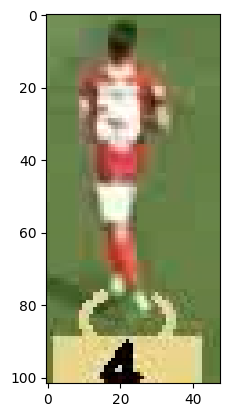

In [13]:
plt.imshow(image)
plt.show()

# take the top half of image


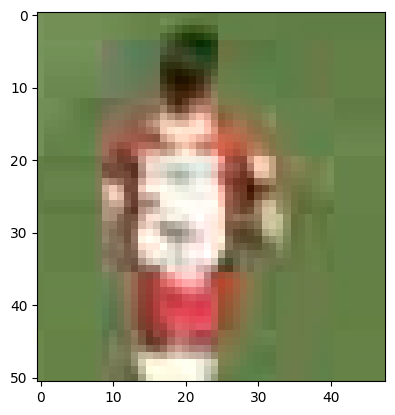

In [14]:
top_half_image=image[0:image.shape[0]//2,0:image.shape[1]]
plt.imshow(top_half_image)
plt.show()

# 通过聚类区分背景和T恤的颜色，取T恤颜色平均值

d:\anaconda3\envs\cuda1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


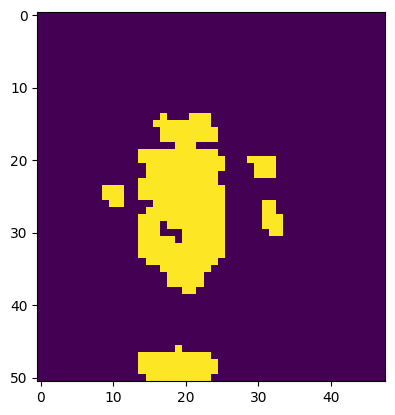

In [15]:
# reshape the image into 2d 
image_2d=top_half_image.reshape((-1,3))
#perform kmeans clustering
kmeans=KMeans(n_clusters=2,random_state=0).fit(image_2d)
# get the labels of the clusters
labels=kmeans.labels_
#reshape the labels into the original image shape
clustered_image=labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

#display the clustered image
plt.imshow(clustered_image)
plt.show()

In [16]:
corner_clusters=[clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
print(corner_clusters)
non_player_cluster=max(set(corner_clusters),key=corner_clusters.count)
print(non_player_cluster)
player_cluster=1-non_player_cluster
print(player_cluster)

[0, 0, 0, 0]
0
1


In [17]:
kmeans.cluster_centers_[player_cluster]


array([232.95652174, 210.51839465, 195.25083612])